<a href="https://colab.research.google.com/github/ssawant/TensorFlow-in-Practice/blob/main/C3W2_NLP_Reading_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [5]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

# imdb_reviews : Large Movie Review Dataset. This is a dataset for binary sentiment classification 
# containing substantially more data than previous benchmark datasets. 
# We provide a set of 25,000 highly polar movie reviews for training, 
# and 25,000 for testing. There is additional unlabeled data for use as well.

In [57]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels= []

for s,l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy()) # l - type EagerTensor convert it to numpy array

for s,l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

0 I'll give it a two because it has a lot of music, otherwise it would be a one.<br /><br />I saw this movie for the first time tonight and it's the first "Road" picture I've seen. I was expecting waaaaay better. Robert Osborn says this is the best of the Road movies. If that's true I needn't bother to see the others. The best thing about this movie is that it has a lot of songs in the first half, but that's balanced out by only one production number with dancing in the entire movie.<br /><br />I didn't like the movie. Neither Hope nor Crosby came across all that well, their characters weren't very charming, the movie was not funny at all, most of the dialog was just lame filler, there wasn't much action, there wasn't much spectacle.<br /><br />The movie wasn't what I expected. I was expecting more "Road," but there isn't much. They quickly make it to the palace and then most of the movie takes place there, until the end. I was also expecting a lot more of the famous "road" style of br

In [40]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = "<OOV>" # OUT OF VOCAB

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index


sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)
# print(training_sentences[0])
# print(sequence[0])
# print(padded[0])
# print(word_index)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)


{'<OOV>': 1, 'the': 2, 'and': 3, 'a': 4, 'of': 5, 'to': 6, 'is': 7, 'br': 8, 'in': 9, 'it': 10, 'i': 11, 'this': 12, 'that': 13, 'was': 14, 'as': 15, 'for': 16, 'with': 17, 'movie': 18, 'but': 19, 'film': 20, 'on': 21, 'not': 22, 'you': 23, 'are': 24, 'his': 25, 'have': 26, 'he': 27, 'be': 28, 'one': 29, 'all': 30, 'at': 31, 'by': 32, 'an': 33, 'they': 34, 'who': 35, 'so': 36, 'from': 37, 'like': 38, 'her': 39, 'or': 40, 'just': 41, 'about': 42, "it's": 43, 'out': 44, 'if': 45, 'has': 46, 'some': 47, 'there': 48, 'what': 49, 'good': 50, 'more': 51, 'when': 52, 'very': 53, 'up': 54, 'no': 55, 'time': 56, 'she': 57, 'even': 58, 'my': 59, 'would': 60, 'which': 61, 'only': 62, 'story': 63, 'really': 64, 'see': 65, 'their': 66, 'had': 67, 'can': 68, 'were': 69, 'me': 70, 'well': 71, 'than': 72, 'we': 73, 'much': 74, 'been': 75, 'bad': 76, 'get': 77, 'will': 78, 'do': 79, 'also': 80, 'into': 81, 'people': 82, 'other': 83, 'first': 84, 'great': 85, 'because': 86, 'how': 87, 'him': 88, 'most':

In [45]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(6, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model.compile(loss=tf.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
flatten_3 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 11526     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [46]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 5s 6ms/step - loss: 0.6118 - accuracy: 0.6334 - val_loss: 0.3375 - val_accuracy: 0.8523
Epoch 2/10
782/782 [==============================] - 4s 6ms/step - loss: 0.2413 - accuracy: 0.9087 - val_loss: 0.3647 - val_accuracy: 0.8400
Epoch 3/10
782/782 [==============================] - 4s 6ms/step - loss: 0.0885 - accuracy: 0.9808 - val_loss: 0.4454 - val_accuracy: 0.8295
Epoch 4/10
782/782 [==============================] - 4s 6ms/step - loss: 0.0207 - accuracy: 0.9978 - val_loss: 0.5191 - val_accuracy: 0.8293
Epoch 5/10
782/782 [==============================] - 4s 6ms/step - loss: 0.0050 - accuracy: 0.9998 - val_loss: 0.5779 - val_accuracy: 0.8292
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.6216 - val_accuracy: 0.8312
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 8.7935e-04 - accuracy: 1.0000 - val_loss: 0.6634 - val_accuracy: 0.8312
Ep

In [53]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(10000, 16)


In [49]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

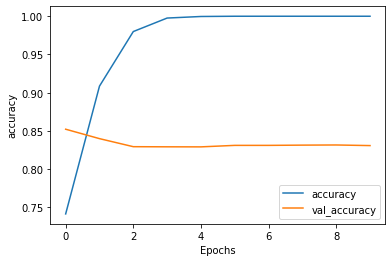

In [50]:
plot_graphs(history, 'accuracy')

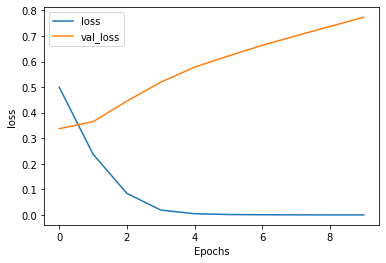

In [51]:
plot_graphs(history, 'loss')

In [54]:
sentence = "this is amazing i really like it. honest."
sequence = tokenizer.texts_to_sequences([sentence])
print(sequence)

[[12, 7, 478, 11, 64, 38, 10, 1200]]
